In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

Model

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

#class

In [3]:
NUM_CLASSES = 63

preprocessing

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

cnn

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 63)                693       
                                                                 
Total params: 1763 (6.89 KB)
Trainable params: 1763 (6.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
335/335 [==============================] - ETA: 0s - loss: 3.5040 - accuracy: 0.0913
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 3s 6ms/step - loss: 3.5040 - accuracy: 0.0913 - val_loss: 2.4832 - val_accuracy: 0.3702
Epoch 2/1000
 28/335 [=>............................] - ETA: 1s - loss: 2.7331 - accuracy: 0.1939

c:\users\prith\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/335 [============================>.] - ETA: 0s - loss: 2.5365 - accuracy: 0.2244
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 5ms/step - loss: 2.5347 - accuracy: 0.2247 - val_loss: 1.8922 - val_accuracy: 0.5478
Epoch 3/1000
328/335 [============================>.] - ETA: 0s - loss: 2.2731 - accuracy: 0.2765
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 4ms/step - loss: 2.2698 - accuracy: 0.2774 - val_loss: 1.6643 - val_accuracy: 0.6055
Epoch 4/1000
326/335 [============================>.] - ETA: 0s - loss: 2.1277 - accuracy: 0.3170
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
335/335 [==============================] - 2s 5ms/step - loss: 2.1263 - accuracy: 0.3174 - val_loss: 1.5053 - val_accuracy: 0.6280
Epoch 5/1000
327/335 [============================>.] - ETA: 0s - loss: 2.0211 - accuracy: 0.3483


In [12]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

112/112 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.8888


In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 166ms/step
[3.10267003e-12 8.36455888e-17 3.71207752e-05 3.40264273e-15
 5.66924498e-08 2.18179991e-18 2.06730371e-13 2.94063263e-08
 1.14597923e-11 6.66624247e-16 2.64904364e-13 4.10508572e-10
 2.86242653e-07 2.99715009e-27 1.08442111e-02 3.53130815e-03
 1.05657738e-04 2.31100671e-07 7.19437972e-02 7.96931978e-24
 7.29692227e-04 7.74190389e-20 3.06116023e-22 2.28784909e-03
 1.62807118e-16 5.86185816e-16 8.72550727e-26 3.00684451e-06
 5.91468871e-01 4.59565909e-23 3.65093090e-02 2.79234815e-03
 1.24308904e-20 1.14498785e-10 8.84690871e-06 1.43201292e-01
 1.20423235e-01 1.10562837e-09 5.40419469e-31 1.59824015e-22
 4.98384598e-14 5.40946836e-11 3.20553312e-07 1.40487614e-07
 5.16640368e-17 1.16032027e-06 1.28804362e-15 3.53096934e-18
 5.52360507e-05 8.27913367e-32 1.85794761e-12 5.48829530e-06
 7.04090258e-12 9.47887820e-05 7.95355532e-04 1.85380026e-03
 7.33333500e-03 3.03814118e-03 5.95892343e-05 0.00000000e+00
 6.39786449e-05 2.81167612e-03 2

446/446 [==============================] - 1s 2ms/step


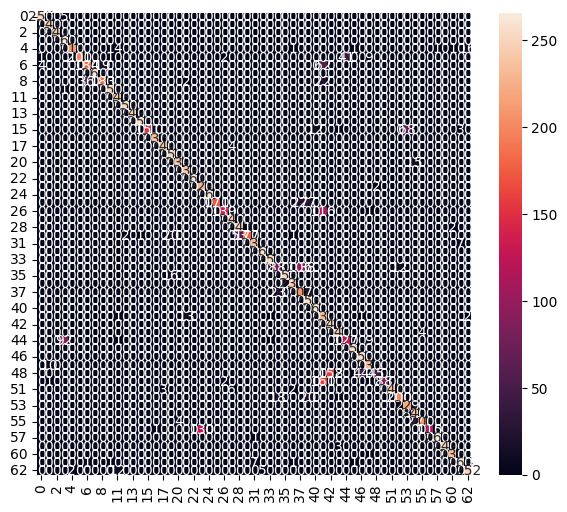

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       260
           1       0.96      1.00      0.98       244
           2       1.00      1.00      1.00       244
           3       0.73      1.00      0.84       266
           4       0.99      0.90      0.94       239
           5       1.00      0.78      0.88       256
           6       0.83      0.68      0.75       269
           7       1.00      1.00      1.00       263
           8       0.91      0.75      0.82       243
          10       0.99      1.00      0.99       253
          11       0.93      1.00      0.96       243
          12       0.99      1.00      1.00       254
          13       1.00      1.00      1.00       249
          14       1.00      1.00      1.00       255
          15       1.00      0.62      0.76       245
          16       0.96      1.00      0.98       236
          17       0.99      0.98      0.99       248
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        # Filter labels with no predicted samples
        filtered_labels = [label for label in labels if label in y_pred]
        print('Classification Report')
        print(classification_report(y_test, y_pred, labels=filtered_labels, zero_division='warn'))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [16]:
# model.save(model_save_path, include_optimizer=False)
model.save('my_model.keras')

In [17]:

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\prith\AppData\Local\Temp\tmp1tn02p4p\assets


INFO:tensorflow:Assets written to: C:\Users\prith\AppData\Local\Temp\tmp1tn02p4p\assets


9140

testing

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.10265051e-12 8.36455359e-17 3.71205388e-05 3.40265353e-15
 5.66923006e-08 2.18179826e-18 2.06729870e-13 2.94063067e-08
 1.14597862e-11 6.66626417e-16 2.64904201e-13 4.10507572e-10
 2.86241914e-07 2.99713680e-27 1.08442344e-02 3.53130093e-03
 1.05657477e-04 2.31099179e-07 7.19438270e-02 7.96928428e-24
 7.29691121e-04 7.74189872e-20 3.06116982e-22 2.28784443e-03
 1.62807012e-16 5.86185498e-16 8.72550234e-26 3.00682859e-06
 5.91468513e-01 4.59567392e-23 3.65092866e-02 2.79234746e-03
 1.24308832e-20 1.14498709e-10 8.84688598e-06 1.43201604e-01
 1.20423265e-01 1.10562559e-09 5.40410864e-31 1.59824532e-22
 4.98384394e-14 5.40946454e-11 3.20553994e-07 1.40487799e-07
 5.16641989e-17 1.16031731e-06 1.28803303e-15 3.53099415e-18
 5.52360762e-05 8.27900142e-32 1.85794977e-12 5.48823937e-06
 7.04083016e-12 9.47881927e-05 7.95353553e-04 1.85380084e-03
 7.33330194e-03 3.03813070e-03 5.95890233e-05 0.00000000e+00
 6.39783611e-05 2.81167403e-03 2.24202167e-12]
28
